In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import savefig
import statsmodels.api as sm
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
data=pd.read_csv("datos_extraidos.csv", sep=";",encoding="latin")
data = data.drop_duplicates() # eliminar filas duplicadas
first_data = data.drop(
    ['propertyCode','thumbnail','operation','address','province',
     'municipality','country','neighborhood','latitude','longitude','url',
     'typology','subtitle','priceByArea'],1)

In [12]:
first_data['status']=first_data['status'].fillna('good') 
first_data['hasParkingSpace'] = first_data['hasParkingSpace'].fillna(False) 
first_data['isParkingSpaceIncludedInPrice'] = first_data['isParkingSpaceIncludedInPrice'].fillna(False)
first_data['parkingIncluded'] = np.where(
    (first_data['hasParkingSpace'] == True) & (first_data['isParkingSpaceIncludedInPrice']== True), True, False) 
first_data['parkingNotIncluded'] = np.where(
    (first_data['hasParkingSpace'] == True) & (first_data['isParkingSpaceIncludedInPrice']== False), True, False) 

#drop the columns we dont need anymore
first_data = first_data.drop(['hasParkingSpace','isParkingSpaceIncludedInPrice'],1)

first_data.district.loc[first_data['district'] == 'VicÃ¡lvaro'] = 'vicalvaro'
first_data.district.loc[first_data['district'] == 'Vic??lvaro'] = 'vicalvaro'
first_data.district.loc[first_data['district'] == 'Chamber??'] = 'Chamberi'
first_data.district.loc[first_data['district'] == 'ChamberÃ­'] = 'Chamberi'
first_data.district.loc[first_data['district'] == 'Chamart??n'] = 'Chamartin'
first_data.district.loc[first_data['district'] == 'ChamartÃ­n'] = 'Chamartin'
first_data.district.loc[first_data['district'] == 'Tetu??n'] = 'Tetuan'
first_data.district.loc[first_data['district'] == 'TetuÃ¡n'] = 'Tetuan'
# mojibake

first_data = pd.get_dummies(first_data, columns=['propertyType','district','status'], 
                            drop_first=True)

In [ ]:
first_data = first_data.drop(['newDevelopment'],1)

In [5]:
first_data['Anyrooms'] = np.where((first_data['rooms'] > 0), True, False) 
first_data['Anybathrooms'] = np.where((first_data['bathrooms'] > 0), True, False) 

In [5]:
first_data.Anybathrooms.value_counts()

True     9862
False       1
Name: Anybathrooms, dtype: int64

In [6]:
first_data.Anyrooms.value_counts()

True     9234
False     629
Name: Anyrooms, dtype: int64

In [7]:
first_data=first_data.drop(['Anybathrooms'],axis=1)

In [8]:
first_data['room/size'] = first_data['rooms']/first_data['size']
first_data['room/bathroom'] = first_data['rooms']/first_data['bathrooms'] 

In [9]:
first_data.drop(first_data[first_data['room/bathroom'].isnull()].index, inplace = True) 

In [10]:
first_data.columns

Index(['numPhotos', 'price', 'size', 'exterior', 'rooms', 'bathrooms',
       'showAddress', 'hasVideo', 'hasPlan', 'has3DTour', 'has360',
       'parkingIncluded', 'parkingNotIncluded', 'propertyType_duplex',
       'propertyType_flat', 'propertyType_penthouse', 'propertyType_studio',
       'district_Barajas', 'district_Barrio de Salamanca',
       'district_Carabanchel', 'district_Centro', 'district_Chamartin',
       'district_Chamberi', 'district_Ciudad Lineal', 'district_Fuencarral',
       'district_Hortaleza', 'district_Latina', 'district_Moncloa',
       'district_Moratalaz', 'district_Puente de Vallecas', 'district_Retiro',
       'district_San Blas', 'district_Tetuan', 'district_Usera',
       'district_Villa de Vallecas', 'district_Villaverde',
       'district_vicalvaro', 'status_newdevelopment', 'status_renew',
       'Anyrooms', 'room/size', 'room/bathroom'],
      dtype='object')

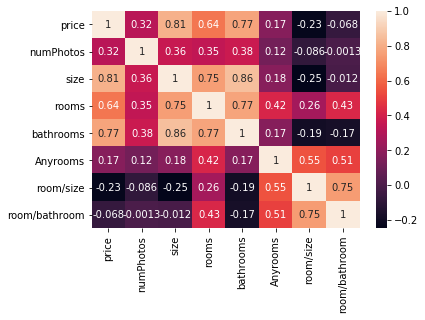

In [11]:
corr1 = first_data[['price','numPhotos', 'size', 'rooms', 'bathrooms', 'Anyrooms', 'room/size', 'room/bathroom']]
Var_Corr = corr1.corr()
corr1_plot = sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [12]:
data=pd.read_csv("datos_extraidos.csv", sep=";",encoding="latin")

In [13]:
data.district.loc[data['district'] == 'VicÃ¡lvaro'] = 'vicalvaro'
data.district.loc[data['district'] == 'Vic??lvaro'] = 'vicalvaro'
data.district.loc[data['district'] == 'Chamber??'] = 'Chamberi'
data.district.loc[data['district'] == 'ChamberÃ­'] = 'Chamberi'
data.district.loc[data['district'] == 'Chamart??n'] = 'Chamartin'
data.district.loc[data['district'] == 'ChamartÃ­n'] = 'Chamartin'
data.district.loc[data['district'] == 'Tetu??n'] = 'Tetuan'
data.district.loc[data['district'] == 'TetuÃ¡n'] = 'Tetuan'
# mojibake

In [14]:
data.district.value_counts()

Centro                 2098
Barrio de Salamanca    1773
Chamberi               1176
Chamartin               763
Moncloa                 648
Tetuan                  583
Hortaleza               446
Retiro                  431
Ciudad Lineal           340
Fuencarral              294
Arganzuela              274
Carabanchel             233
Latina                  176
San Blas                162
Puente de Vallecas      131
Usera                   100
Villa de Vallecas        78
Villaverde               65
Barajas                  64
vicalvaro                36
Moratalaz                33
Name: district, dtype: int64

In [15]:
sns.set(rc={'figure.figsize':(18,18)})

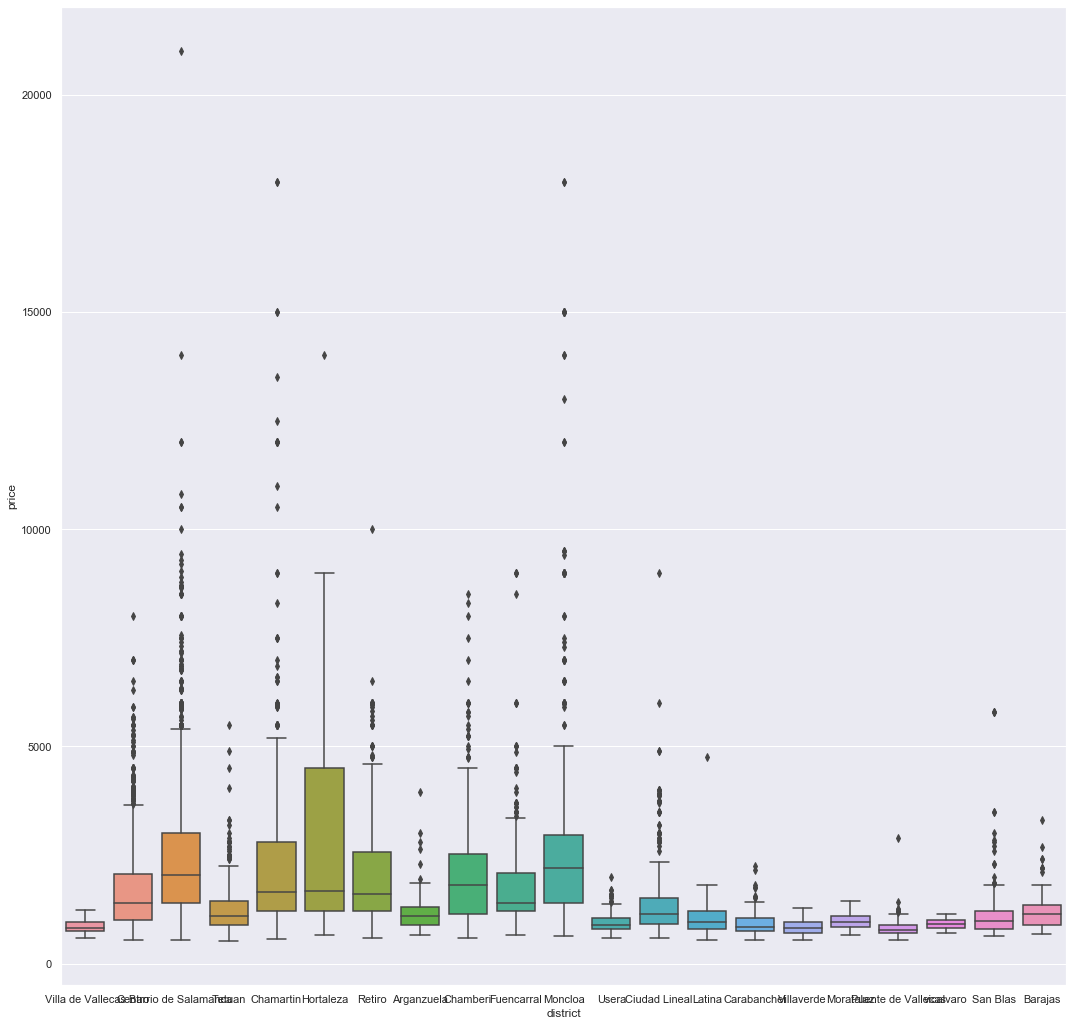

In [16]:
sns.boxplot(x=data['district'],y=data['price'])

In [17]:
sns.set(rc={'figure.figsize':(8,8)})

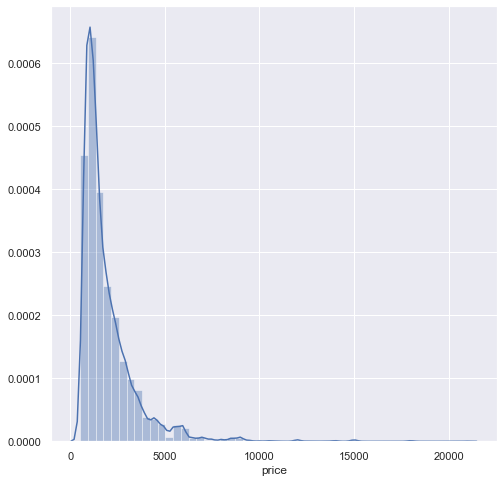

In [18]:
sns.distplot(data['price'])

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [21]:
data_cluster = first_data[['price','size']]
inertia = [] #sum of squares
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_cluster)
    kmeanModel.fit(data_cluster)
    inertia.append(kmeanModel.inertia_)

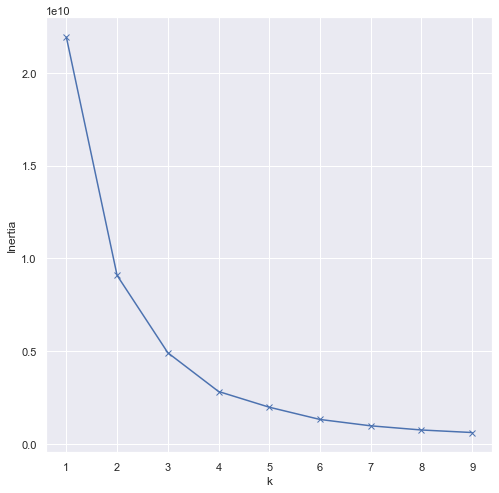

In [22]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()  # ~3 o 4

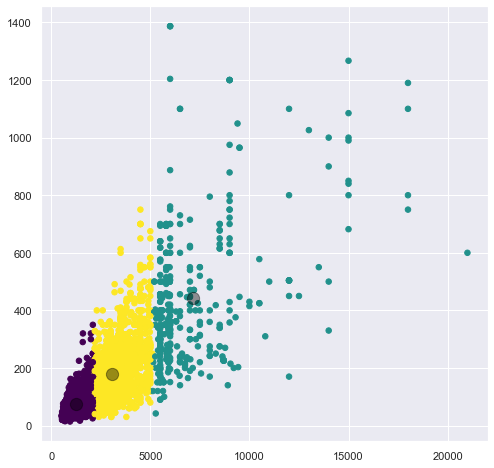

In [23]:
kmeans = KMeans(n_clusters=3).fit(data_cluster)
labels = kmeans.predict(data_cluster)
plt.scatter(data_cluster.iloc[:, 0], data_cluster.iloc[:, 1], c=labels, s=30, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.4);

In [24]:
centers

array([[1247.8773679 ,   75.58567156],
       [7151.60416667,  443.90104167],
       [3074.92429792,  179.25478225]])

In [25]:
labels=pd.DataFrame(labels)
labels['new']=labels
labels.new.value_counts() 

0    7021
2    2457
1     384
Name: new, dtype: int64

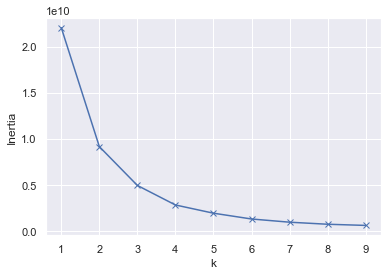

In [61]:
data_cluster = first_data[['price','size','bathrooms']]
inertia = [] #sum of squares
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_cluster)
    kmeanModel.fit(data_cluster)
    inertia.append(kmeanModel.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()  # 3, 4

In [62]:
kmeans = KMeans(n_clusters=4).fit(data_cluster)
labels = kmeans.predict(data_cluster)
colores=['red','green','blue','pink']

asignar=[]
for row in labels:
    asignar.append(colores[row])

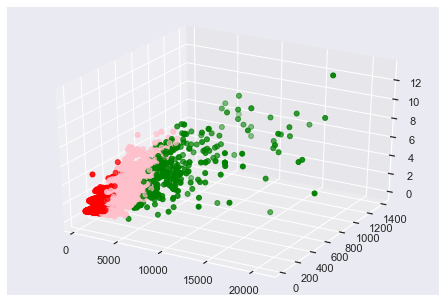

In [67]:
kmeans = KMeans(n_clusters=3).fit(data_cluster)
labels = kmeans.predict(data_cluster)
colores=['red','green','pink']

asignar=[]
for row in labels:
    asignar.append(colores[row])
    
    
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

C = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_cluster.iloc[:, 0], data_cluster.iloc[:, 1], data_cluster.iloc[:, 2],s=25, c=asignar)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=200)

In [68]:
labels=pd.DataFrame(labels)
labels['new']=labels
labels.new.value_counts() 

0    7015
2    2464
1     384
Name: new, dtype: int64

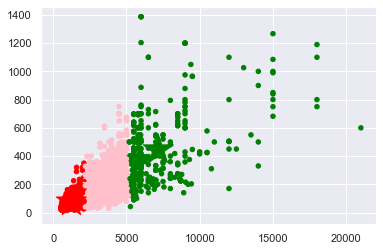

In [72]:
# Getting the values and plotting it
f1 = data_cluster['price'].values
f2 = data_cluster['size'].values
 
plt.scatter(f1, f2, c=asignar, s=20)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

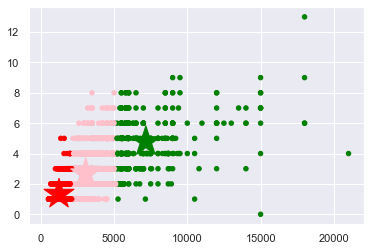

In [74]:
# Getting the values and plotting it
f1 = data_cluster['price'].values
f2 = data_cluster['bathrooms'].values
 
plt.scatter(f1, f2, c=asignar, s=20)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

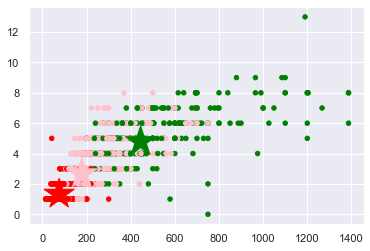

In [76]:
# Getting the values and plotting it
f1 = data_cluster['size'].values
f2 = data_cluster['bathrooms'].values
 
plt.scatter(f1, f2, c=asignar, s=20)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [85]:
labels = kmeans.predict(data_cluster)
first_data['labels']=labels
first_data.labels.value_counts()

0    7015
2    2464
1     384
Name: labels, dtype: int64

In [87]:
first_data.loc[first_data.labels==2,'labels']=1
first_data.labels.value_counts()

0    7015
1    2848
Name: labels, dtype: int64

In [31]:
data=pd.read_csv("datos_extraidos.csv", sep=";",encoding="latin")
data = data.drop_duplicates() # eliminar filas duplicadas
first_data = data.drop(
    ['propertyCode','thumbnail','operation','address','province',
     'municipality','country','neighborhood','latitude','longitude','url',
     'typology','subtitle','priceByArea'],1)

In [32]:
first_data.district.loc[first_data['district'] == 'VicÃ¡lvaro'] = 'vicalvaro'
first_data.district.loc[first_data['district'] == 'Vic??lvaro'] = 'vicalvaro'
first_data.district.loc[first_data['district'] == 'Chamber??'] = 'Chamberi'
first_data.district.loc[first_data['district'] == 'ChamberÃ­'] = 'Chamberi'
first_data.district.loc[first_data['district'] == 'Chamart??n'] = 'Chamartin'
first_data.district.loc[first_data['district'] == 'ChamartÃ­n'] = 'Chamartin'
first_data.district.loc[first_data['district'] == 'Tetu??n'] = 'Tetuan'
first_data.district.loc[first_data['district'] == 'TetuÃ¡n'] = 'Tetuan'
# mojibake

In [72]:
max(first_data['rooms'])

24

In [76]:
first_data[first_data['rooms']==24]

,numPhotos,price,size,exterior,rooms,bathrooms,showAddress,hasVideo,newDevelopment,hasPlan,...,district_Puente de Vallecas,district_Retiro,district_San Blas,district_Tetuan,district_Usera,district_Villa de Vallecas,district_Villaverde,district_vicalvaro,status_newdevelopment,status_renew
3793,43,15000.0,682.0,False,24,4,False,True,False,True,...,0,0,0,0,0,0,0,0,0,0


In [73]:
max(first_data['numPhotos'])

182

In [77]:
first_data[first_data['numPhotos']==182]

,numPhotos,price,size,exterior,rooms,bathrooms,showAddress,hasVideo,newDevelopment,hasPlan,...,district_Puente de Vallecas,district_Retiro,district_San Blas,district_Tetuan,district_Usera,district_Villa de Vallecas,district_Villaverde,district_vicalvaro,status_newdevelopment,status_renew
4105,182,1600.0,120.0,True,4,1,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [74]:
max(first_data['bathrooms'])

13

In [78]:
first_data[first_data['bathrooms']==13]

,numPhotos,price,size,exterior,rooms,bathrooms,showAddress,hasVideo,newDevelopment,hasPlan,...,district_Puente de Vallecas,district_Retiro,district_San Blas,district_Tetuan,district_Usera,district_Villa de Vallecas,district_Villaverde,district_vicalvaro,status_newdevelopment,status_renew
9015,40,18000.0,1190.0,False,8,13,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [84]:
first_data[first_data['price']>10000]

,numPhotos,price,size,exterior,rooms,bathrooms,showAddress,hasVideo,newDevelopment,hasPlan,...,district_Puente de Vallecas,district_Retiro,district_San Blas,district_Tetuan,district_Usera,district_Villa de Vallecas,district_Villaverde,district_vicalvaro,status_newdevelopment,status_renew
410,98,11000.0,500.0,False,25,6,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
477,36,14000.0,900.0,False,25,6,False,True,False,True,...,0,0,0,0,0,0,0,0,0,0
479,33,15000.0,840.0,False,64,8,False,True,False,True,...,0,0,0,0,0,0,0,0,0,0
494,91,18000.0,800.0,False,64,6,False,True,False,True,...,0,0,0,0,0,0,0,0,0,0
532,52,12500.0,450.0,False,25,6,False,True,False,True,...,0,0,0,0,0,0,0,0,0,0
577,41,12000.0,170.0,True,9,3,True,False,False,True,...,0,0,0,0,0,0,0,0,0,0
699,20,14000.0,1000.0,False,25,7,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
818,42,12000.0,504.0,True,25,6,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
1198,47,10500.0,425.0,True,25,5,False,True,False,True,...,0,0,0,0,0,0,0,0,0,0
1228,55,12000.0,504.0,True,25,6,False,True,False,True,...,0,0,0,0,0,0,0,0,0,0


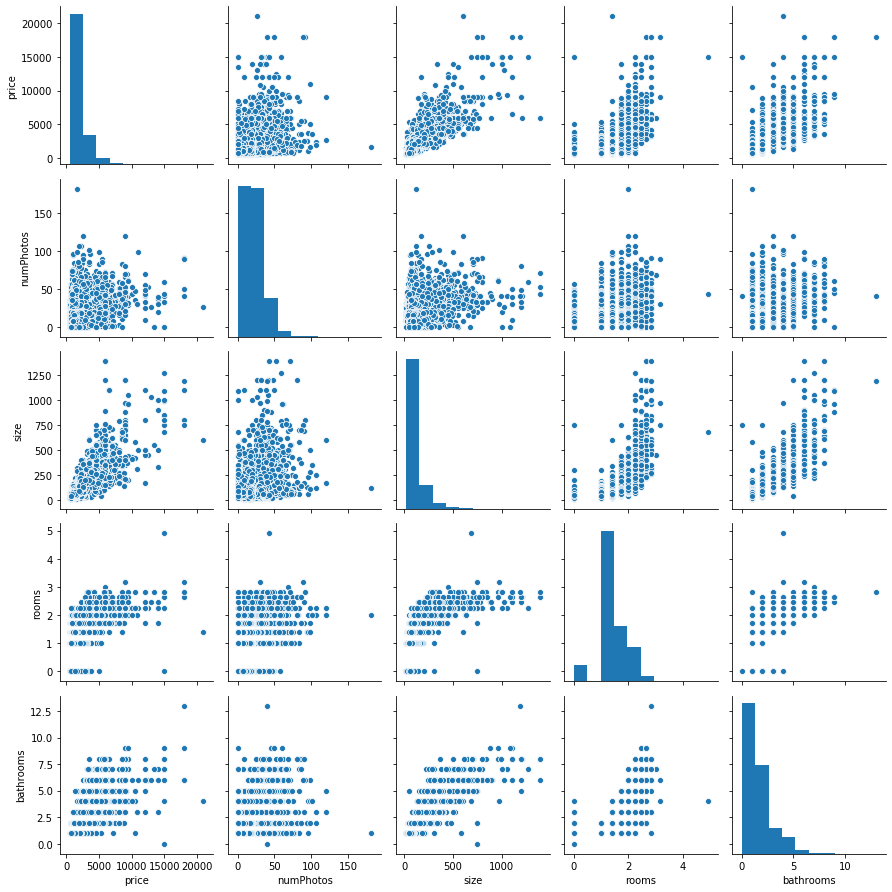

In [22]:
first_data['rooms']=np.sqrt(first_data['rooms'])
data_pairplot = first_data[['price','numPhotos','size','rooms','bathrooms']]
sns.pairplot(data_pairplot, size=2.5)
pairplot = plt.tight_layout()

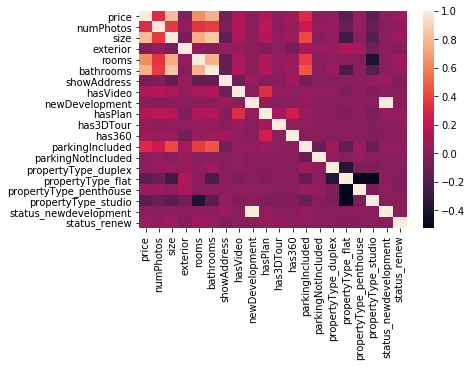

In [13]:
corr1 = first_data[['price','numPhotos', 'size', 'exterior', 'rooms', 'bathrooms', 'showAddress',
       'hasVideo', 'newDevelopment', 'hasPlan', 'has3DTour', 'has360', 
       'parkingIncluded', 'parkingNotIncluded', 'propertyType_duplex',
       'propertyType_flat', 'propertyType_penthouse', 'propertyType_studio','status_newdevelopment', 'status_renew']]
Var_Corr = corr1.corr()
corr1_plot = sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns)
fig = corr1_plot.get_figure()
fig.savefig("corr1.png", dpi=500)

In [24]:
Var_Corr

,price,numPhotos,size,exterior,rooms,bathrooms,showAddress,hasVideo,newDevelopment,hasPlan,has3DTour,has360,parkingIncluded,parkingNotIncluded,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,status_newdevelopment,status_renew
price,1.000000,0.318691,0.810752,-0.015788,0.543315,0.767656,-0.081357,0.126213,0.001730,0.139230,0.023651,0.077440,0.310438,0.008310,0.025642,-0.165287,0.051882,-0.168370,0.001730,0.064793
numPhotos,0.318691,1.000000,0.362730,0.027896,0.312793,0.375131,-0.040235,0.148655,-0.008591,0.185804,0.006542,0.055832,0.231228,0.031158,0.046920,-0.105694,0.053308,-0.115415,-0.008591,0.029861
size,0.810752,0.362730,1.000000,-0.054318,0.625691,0.855152,-0.135678,0.121971,0.005445,0.149639,0.031156,0.065638,0.422167,-0.005139,0.035721,-0.258984,0.020834,-0.171927,0.005445,0.077908
exterior,-0.015788,0.027896,-0.054318,1.000000,0.076972,-0.011621,0.048684,0.042781,0.007450,-0.031587,0.024333,-0.069365,0.102861,0.047715,0.048078,0.131556,0.110215,-0.080292,0.007450,-0.018088
rooms,0.543315,0.312793,0.625691,0.076972,1.000000,0.657177,-0.125688,0.087331,0.011210,0.116076,0.037633,0.061754,0.331474,-0.004283,0.020012,0.216599,0.003937,-0.664547,0.011210,0.052026
bathrooms,0.767656,0.375131,0.855152,-0.011621,0.657177,1.000000,-0.127197,0.129837,0.008494,0.155666,0.026506,0.068285,0.458349,-0.001652,0.074516,-0.227976,0.014042,-0.169542,0.008494,0.042631
showAddress,-0.081357,-0.040235,-0.135678,0.048684,-0.125688,-0.127197,1.000000,-0.094283,0.062417,-0.019981,-0.005376,0.073278,-0.069415,-0.005115,-0.011104,0.015688,0.011305,0.036554,0.062417,-0.028361
hasVideo,0.126213,0.148655,0.121971,0.042781,0.087331,0.129837,-0.094283,1.000000,-0.001407,0.323292,0.046224,0.020496,0.032579,0.018676,0.018370,-0.042616,0.020857,-0.029133,-0.001407,0.003580
newDevelopment,0.001730,-0.008591,0.005445,0.007450,0.011210,0.008494,0.062417,-0.001407,1.000000,0.039733,-0.002945,-0.006390,0.032680,-0.006789,-0.005918,-0.007381,0.018509,-0.008428,1.000000,-0.002022
hasPlan,0.139230,0.185804,0.149639,-0.031587,0.116076,0.155666,-0.019981,0.323292,0.039733,1.000000,0.095742,0.252164,0.061414,0.009612,-0.006285,-0.029658,0.016512,-0.041413,0.039733,0.039194


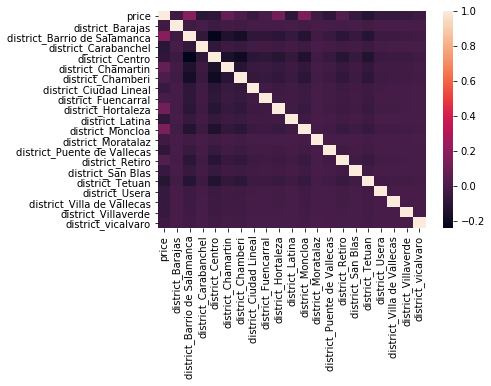

In [14]:
corr2 = first_data[['price','district_Barajas', 'district_Barrio de Salamanca',
      'district_Carabanchel', 'district_Centro', 'district_Chamartin',
      'district_Chamberi', 'district_Ciudad Lineal', 'district_Fuencarral',
      'district_Hortaleza', 'district_Latina', 'district_Moncloa',
      'district_Moratalaz', 'district_Puente de Vallecas', 'district_Retiro',
      'district_San Blas', 'district_Tetuan', 'district_Usera',
      'district_Villa de Vallecas', 'district_Villaverde',
      'district_vicalvaro']]
Var_Corr2 = corr2.corr()
corr2_plot = sns.heatmap(Var_Corr2, xticklabels=Var_Corr2.columns, yticklabels=Var_Corr2.columns)
fig = corr2_plot.get_figure()
fig.savefig("corr2.png", dpi=500)

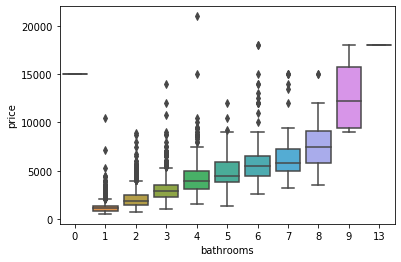

In [26]:
bathrooms = sns.boxplot(x=first_data['bathrooms'], y=first_data['price'])
fig = bathrooms.get_figure()
fig.savefig("bathrooms.png", dpi=500)

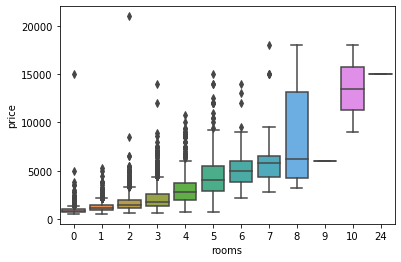

In [27]:
rooms = sns.boxplot(x=first_data['rooms'], y=first_data['price'])
fig = rooms.get_figure()
fig.savefig("rooms.png", dpi=500)

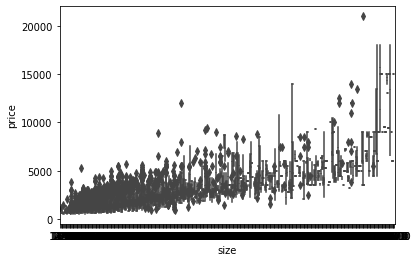

In [28]:
sns.boxplot(x=first_data['size'], y=first_data['price'])

In [29]:
size = pd.qcut(first_data['size'], q=10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # variable continua, deciles
size=size.astype(int)

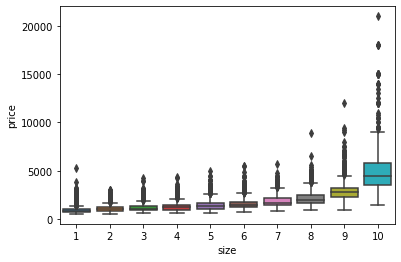

In [30]:
size = sns.boxplot(x=size, y=first_data['price'])
fig = size.get_figure()
fig.savefig("size.png", dpi=500)

In [127]:
x_train[x_train['rooms']>5]

,size,rooms,bathrooms
604,694.0,7,8
5012,180.0,6,2
3685,576.0,6,6
2152,965.0,7,9
4493,570.0,7,7
...,...,...,...
1767,613.0,6,5
6979,550.0,7,5
664,400.0,6,4
445,800.0,7,6


In [129]:
x_train[x_train['bathrooms']>4]

,size,rooms,bathrooms
604,694.0,7,8
2642,370.0,5,5
2798,290.0,3,5
1829,399.0,5,5
2466,330.0,5,5
...,...,...,...
4173,450.0,5,5
2010,222.0,4,5
445,800.0,7,6
3775,400.0,7,6


In [138]:
len(y_train[y_train>10000])

31

In [140]:
x_train[x_train['size']>300]

,size,rooms,bathrooms
604,694.0,7,8
2642,370.0,5,5
9673,310.0,5,4
2680,500.0,5,3
1829,399.0,5,5
...,...,...,...
8841,360.0,5,3
445,800.0,7,6
3775,400.0,7,6
7,400.0,5,5


ANALYSIS

In [31]:
data_reg = first_data[['price','size','rooms','bathrooms']]
y = data_reg['price']
x = data_reg.drop(['price'],1)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=88)

In [32]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 394.4436001498186
Coefficients: 
 [  8.40050541 -18.94308087 339.0685002 ]


In [33]:
reg_pred = regr.predict(x_test)

In [34]:
error_reg = pd.DataFrame([mean_absolute_error(reg_pred, y_test), mean_squared_error(reg_pred, y_test),np.sqrt(mean_squared_error(reg_pred, y_test))],
                        index = ['MAE','MSE','RMSE'])

error_reg.columns=['reg_multiple']

In [36]:
error_reg

,reg_multiple
MAE,497.836345
MSE,711676.346334
RMSE,843.609119


In [37]:
x_train1 = sm.add_constant(x_train) # adding a constant
model = sm.OLS(y_train, x_train1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     5732.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:53:56   Log-Likelihood:                -64401.
No. Observations:                7890   AIC:                         1.288e+05
Df Residuals:                    7886   BIC:                         1.288e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        394.4436     19.948     19.773      0.000     355.340     433.547
size           8.4005      0.174     48.211      0.000       8.059       8.742
rooms        -18.9431     11.144     -1.700      0.089     -40.788       2.902
bathrooms    339.0685     17.181     19.736      0.000     305.390     372.747
==============================================================================
Omnibus:                     5603.414   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           331282.782
Skew:                           2.792   Prob(JB):                         0.00
Kurtosis:                      34.249   Cond. No.                         374.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
data_reg = first_data[['price','size','bathrooms']]
y = data_reg['price']
x = data_reg.drop(['price'],1)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=88)

In [39]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 381.16962745914566
Coefficients: 
 [  8.31977277 328.13485555]


In [40]:
reg_pred = regr.predict(x_test)

In [41]:
error_reg = pd.DataFrame([mean_absolute_error(reg_pred, y_test), mean_squared_error(reg_pred, y_test),np.sqrt(mean_squared_error(reg_pred, y_test))],
                        index = ['MAE','MSE','RMSE'])
error_reg.columns=['reg_multiple']
error_reg

,reg_multiple
MAE,498.404103
MSE,712050.290308
RMSE,843.830724


In [42]:
x_train1 = sm.add_constant(x_train) # adding a constant
model = sm.OLS(y_train, x_train1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     8595.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:00:06   Log-Likelihood:                -64402.
No. Observations:                7890   AIC:                         1.288e+05
Df Residuals:                    7887   BIC:                         1.288e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        381.1696     18.358     20.763      0.000     345.182     417.157
size           8.3198      0.168     49.620      0.000       7.991       8.648
bathrooms    328.1349     15.933     20.595      0.000     296.902     359.368
==============================================================================
Omnibus:                     5617.040   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           329905.443
Skew:                           2.805   Prob(JB):                         0.00
Kurtosis:                      34.177   Cond. No.                         371.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
tree = DecisionTreeRegressor(random_state = 88, max_depth=3)
tree = tree.fit(x_train, y_train)

In [44]:
tree_pred = tree.predict(x_test)

In [45]:
error_reg = pd.DataFrame([mean_absolute_error(tree_pred, y_test), mean_squared_error(tree_pred, y_test),np.sqrt(mean_squared_error(tree_pred, y_test))],
                        index = ['MAE','MSE','RMSE'])

In [46]:
error_reg

,0
MAE,527.556647
MSE,754977.147757
RMSE,868.894210


In [47]:
export_graphviz(tree, out_file='tree_3var.dot', feature_names = x_test.columns,
                rounded = True, proportion = False, precision = 2,
                filled = True, class_names=True, node_ids=True)
!dot -Tpng tree_3var.dot -o tree2.png